In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the Advertising dataset (as an example for simple linear regression)
ad_url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
# otherwise you can download the file and carry on analysis
df = pd.read_csv(ad_url) #, index_col=0)
print(df.columns)

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


In [3]:
feature_names = ['TV']
label = 'sales'

X = df[feature_names]
y = df[label]

In [4]:
from sklearn.model_selection import train_test_split
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 10.20
R-squared (R2): 0.68


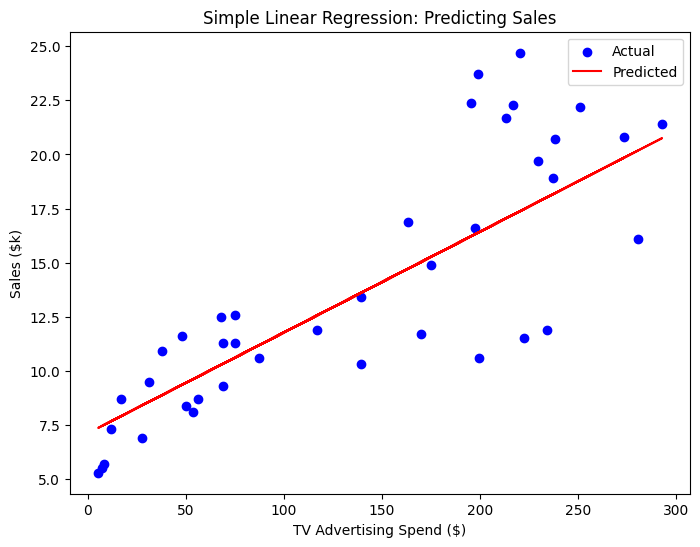

In [7]:
# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('TV Advertising Spend ($)')
plt.ylabel('Sales ($k)')
plt.title('Simple Linear Regression: Predicting Sales')
plt.legend()
plt.show()

Multivariate Linear Regression

In [8]:
# Use multiple features to predict Sales
feature_names = ['TV', 'radio', 'newspaper']
X_multi = df[feature_names]
y_multi = df[label]

In [9]:
# Train-test split
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

In [10]:
# Fit the model
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

LinearRegression()

In [11]:
# Predict on the test set
y_pred_multi = multi_model.predict(X_test_multi)

# Evaluate the model
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print(f'Mean Squared Error (MSE) for Multiple Regression: {mse_multi:.2f}')
print(f'R-squared (R2) for Multiple Regression: {r2_multi:.2f}')

Mean Squared Error (MSE) for Multiple Regression: 3.17
R-squared (R2) for Multiple Regression: 0.90


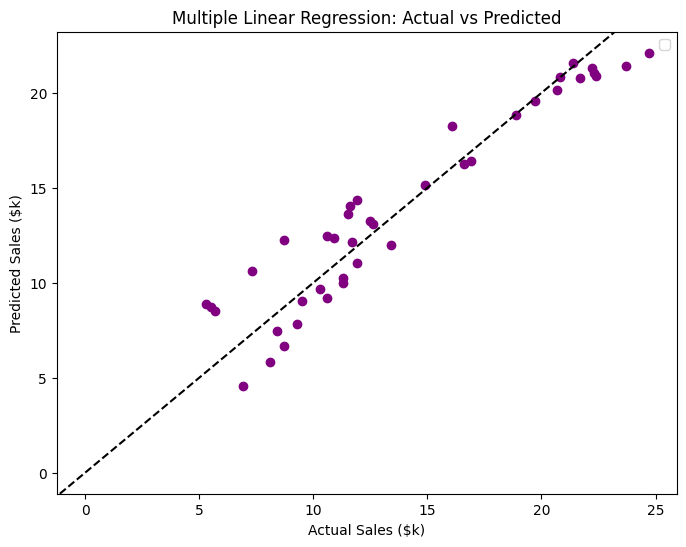

In [12]:
# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test_multi, y_pred_multi, color='purple')
plt.xlabel('Actual Sales ($k)')
plt.ylabel('Predicted Sales ($k)')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.axline((0, 0), slope=1, color='black', linestyle='--')
plt.legend()
plt.show()

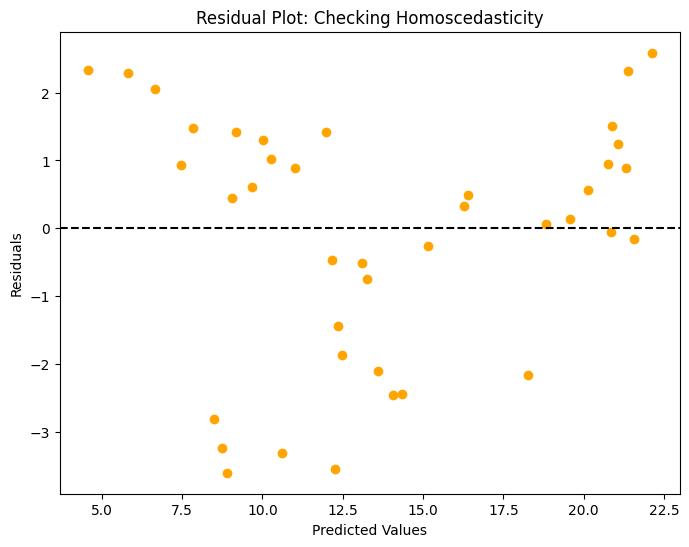

In [13]:
# Residual analysis for checking assumptions
residuals = y_test_multi - y_pred_multi

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_multi, residuals, color='orange')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot: Checking Homoscedasticity')
plt.show()

In [14]:
sns.histplot(residuals, kde=True, color='green')
plt.title('Residual Distribution: Checking Normality')
plt.xlabel('Residuals')
plt.show()

NameError: name 'sns' is not defined

Multicolinearity

In [ ]:
import seaborn as sns
corr_matrix = X_multi.corr()
sns.heatmap(corr_matrix, cmap="Greens", annot=True)